### 121. Best Time to Buy and Sell Stock
---
Say you have an array for which the ith element is the price of a given stock on day i.

If you were only permitted to complete at most one transaction (i.e., buy one and sell one share of the stock), design an algorithm to find the maximum profit.

Note that you cannot sell a stock before you buy one.

Example 1:

Input: [7,1,5,3,6,4] <br>
Output: 5 <br>
Explanation: Buy on day 2 (price = 1) and sell on day 5 (price = 6), profit = 6-1 = 5.
             Not 7-1 = 6, as selling price needs to be larger than buying price.
             
Example 2:

Input: [7,6,4,3,1]<br>
Output: 0<br>
Explanation: In this case, no transaction is done, i.e. max profit = 0.

### 주식을 사고팔기 가장 좋은 시점 
--- 한 번의 거래로 낼 수 있는 최대 이익을 산출하라

* __입력__
> [7,1,5,3,6,4]
* __출력__
> 5
* __설명__ <br>
 1일 때 사서 6일 때 팔면 5의 이익을 얻는다.

###  풀이 1. 브루트 포스 계산 
---
이 문제는 저점에 사서 고점에 팔아서, 낼 수 있는 최대 이익을 찾는 흥미로운 문제다.
가장 먼저 접근할 풀이법은 당연히 브루트 포스다. 처음부처 _O(n^2)_ 으로 사고팔고를 반복하면, 마지막에 최대 이익을 산출할 수 있을 것 같다.

In [ ]:
def maxProfit(self, prices: List[int]) -> int:
    max_price = 0
    
    for i, n in enumerate(prices):
        for j in range(i, len(prices)):
            max_price = max(prices[j] - prices, max_price)
    return max_price

하지만, 안타깝게도 이 풀이는 타임아웃으로 풀리지 않는다. 좀 더 효율적인 풀이가 필요하다.

###  풀이 2. 저점과 현재 값과의 차이 계산
---
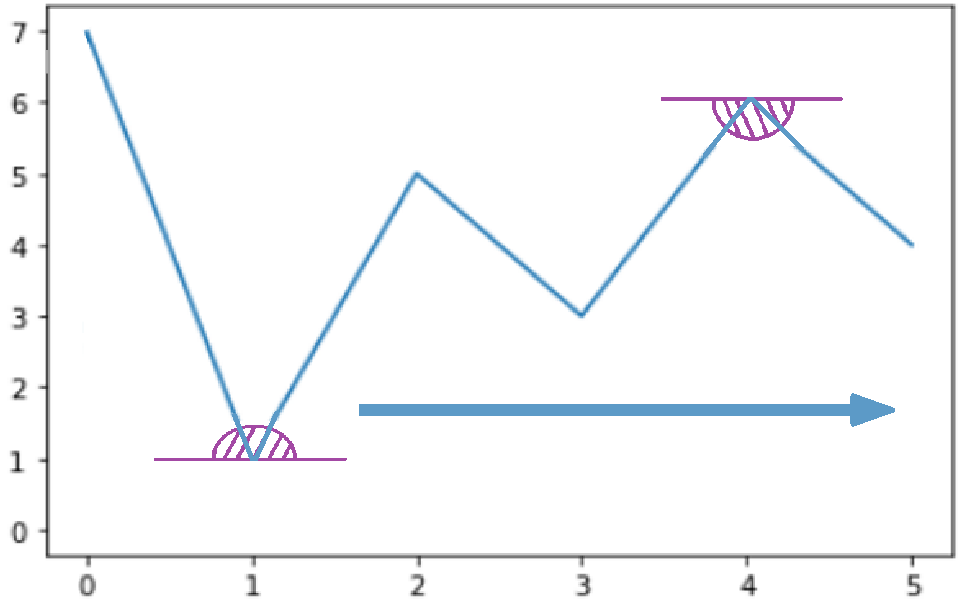
* __그림 7-12__ 현재 값이 우측으로 이동하면서 저점과 차이 계산

입력값 [7, 1, 5, 3, 6, 4]을 그림 7-12와 같이 그래프로 그려보자. 이처럼 값을 그래프로 나열해서 시각화해보면 대략 어떤 식으로 풀어야 할지 직관이 생길 것이다. 인덱스 1 은 저점을 가리키고 있고 인덱스 4는 고점을 가리킨다. 여기서는 혀재값을 가리키는 포인터가 우측으로 이동하면서 이전 상태의 저점을 기준으로 가격차이를 계산하고, 만약 클 경우 최댓값을 계속 교체해나가는 형태로 _O(n)_ 풀이가 가능할 것 같다. 이처럼 직접 그림으로 나타낸느 시각화 작업을 해보면, 어려운 문제를 맞닥뜨려도 풀이에 대한 직관이 떠오를 수 있다. 이와 같은 시각화는 기술 통계학(Descriptive Statistics)이라고 일컬으며, 통계학에서도 매우 중요한 연구 분야 중 하나이기도 하다. 이제 다음과 같이 최댓값, 최솟값을 선언해보자.

    profit = -sys.maxsize
    min_price = sys.maxsize
    
최댓값이 되어야 할 profit 변수와 최솟값이 되어야 할 min_price 변수의 초깃값은 이처럼 각각 시스템의 가장 작은 값, 가장 큰 값으로 정한다. 즉 최댓값 변수는 최솟값으로, 최솟값 변수는 최댓값으로 지정한다. 그래야 어떤 값이 들어오든 바로 교체될 수 있기 때문이다. 만약 None으로 잡아두게 되면 비교 시 타입 에러(Type Error)가 발생할 수 있기 때문에 이처럼 최솟값, 최댓값은 시스템의 최댓값, 최솟값으로 설정하는 게 편하다. 단, 이 문제에서는 최대 이익 profit이 나중에 최종 결과로 리턴되는데, 입력값이 []인 경우, 즉 빈 배열인 경우에는 자칫 -sys.maxsize가 그래도 리턴될 수 있기 때문이다.

    profit = 0
    min_price = sys.maxsize
    
여기서는 이와 같이 0으로 설정해본다. 어차피 최댓값은 0보다는 항상 커야하기 때문이다. 이후 최저점과 비교해 더 작을 경우 최솟값을 갱신하고, 현재 값과 최솟값과의 차이를 계산해 만약 더 클 겨우 최댓값 profit을 계속 갱신하면서 반복한다. 이제 전체 코드는 다음과 같다.

In [ ]:
def maxProfit(self, prices: List[int]) -> int:
    profit = 0
    min_price = sys.maxsize
    
    # 최솟값과 최댓값을 계속 갱신
    for price in prices:
        min_price = min(min_price, price)
        profit = max(profit, price - min_price)
        
    return profit

원래 이 12번 문제는 컴퓨터과학 분야에서 매우 유명한 유서 깊은 문제이자, 23장에서 살펴볼 86번 '최대 서브 배열' 문제와도 유사하다. 그 문제는 카데인 알고리즘(Kadane's Algorithm)이라는 방법으로 _O(n)_ 에 풀이할 수 있다. 마찬가지로 이 책에서도 86번 문제는 카데인 알고리즘으로 풀이해볼 것이다. 사실 이 12번 문제는 86번 '최대 서브 배열'문제에서 전체 합이 아닌 저점과 고점의 차이 값이라는 정도만 다를 뿐, 거의 동일한 유형의 문제로 볼 수 있다. 따라서 여기서도 카데인 알고리즘을 응용해 _O(n)_ 에 풀이해보았다.